In [54]:
import pandas as pd
import numpy as np

In [55]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [56]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [57]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [58]:
df=pd.read_csv('covid_19_india.csv')

In [59]:
df['Date'] =  df['Date'].apply(lambda x:pd.to_datetime(x, format='%d-%m-%Y'))

In [60]:
df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [61]:
df

Date State/UnionTerritory  Cured  Deaths  Confirmed
0    2020-01-30               Kerala      0       0          1
1    2020-01-31               Kerala      0       0          1
2    2020-02-01               Kerala      0       0          2
3    2020-02-02               Kerala      0       0          3
4    2020-02-03               Kerala      0       0          3
...         ...                  ...    ...     ...        ...
1473 2020-04-30            Telengana    367      26       1012
1474 2020-04-30              Tripura      2       0          2
1475 2020-04-30          Uttarakhand     36       0         55
1476 2020-04-30        Uttar Pradesh    513      39       2203
1477 2020-04-30          West Bengal    124      22        758

[1478 rows x 5 columns]

In [62]:
df= df[df['State/UnionTerritory']!='Jharkhand#']
df=df[df['State/UnionTerritory']!='Unassigned']
df=df[df['State/UnionTerritory']!='Nagaland#']

In [63]:
states=df['State/UnionTerritory'].unique()

In [64]:
states

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya'], dtype=object)

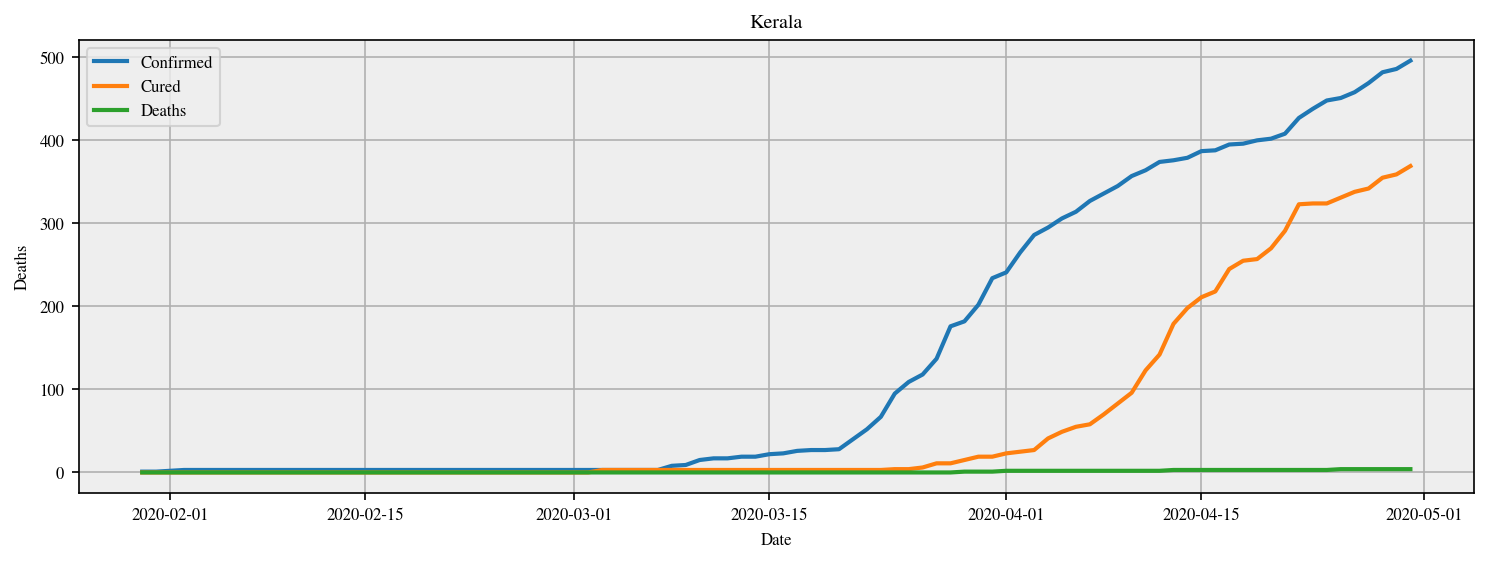

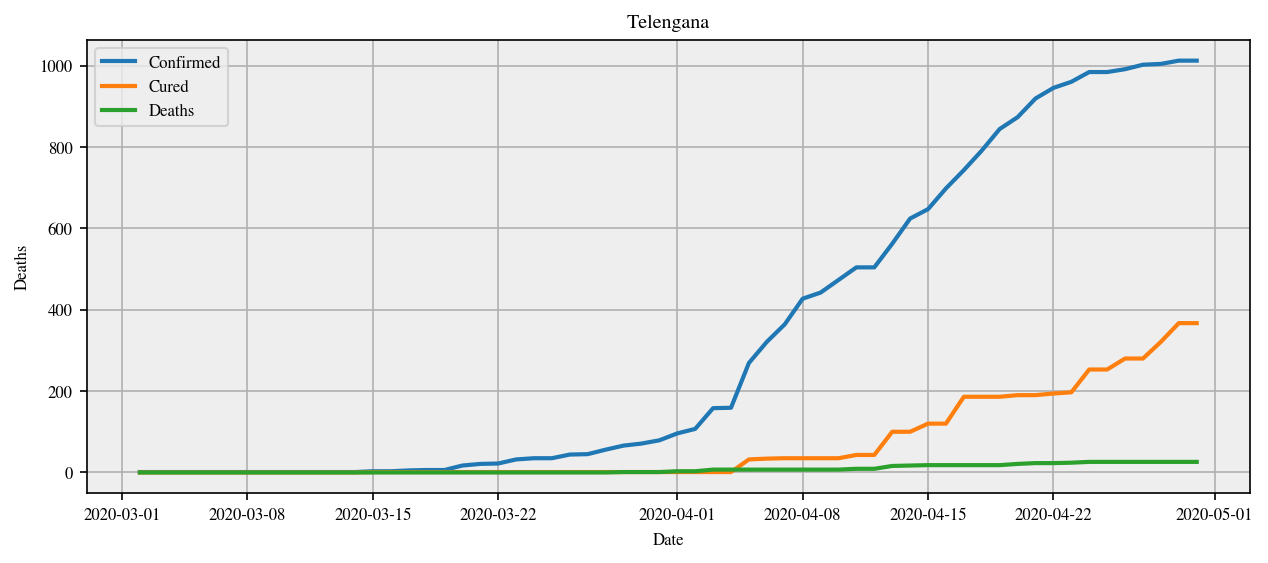

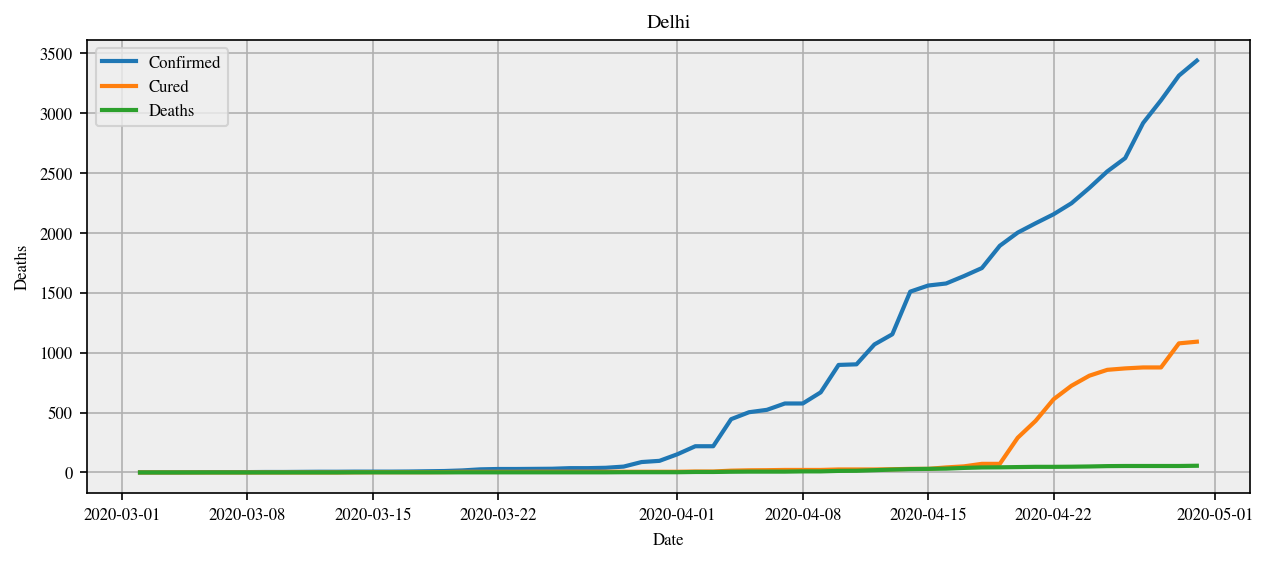

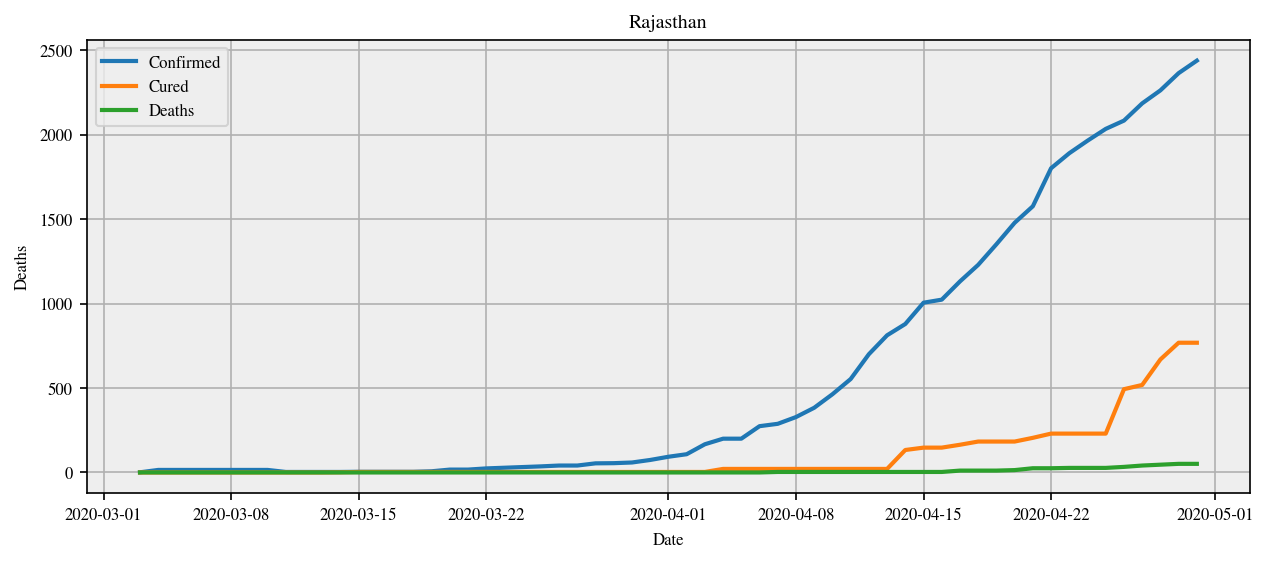

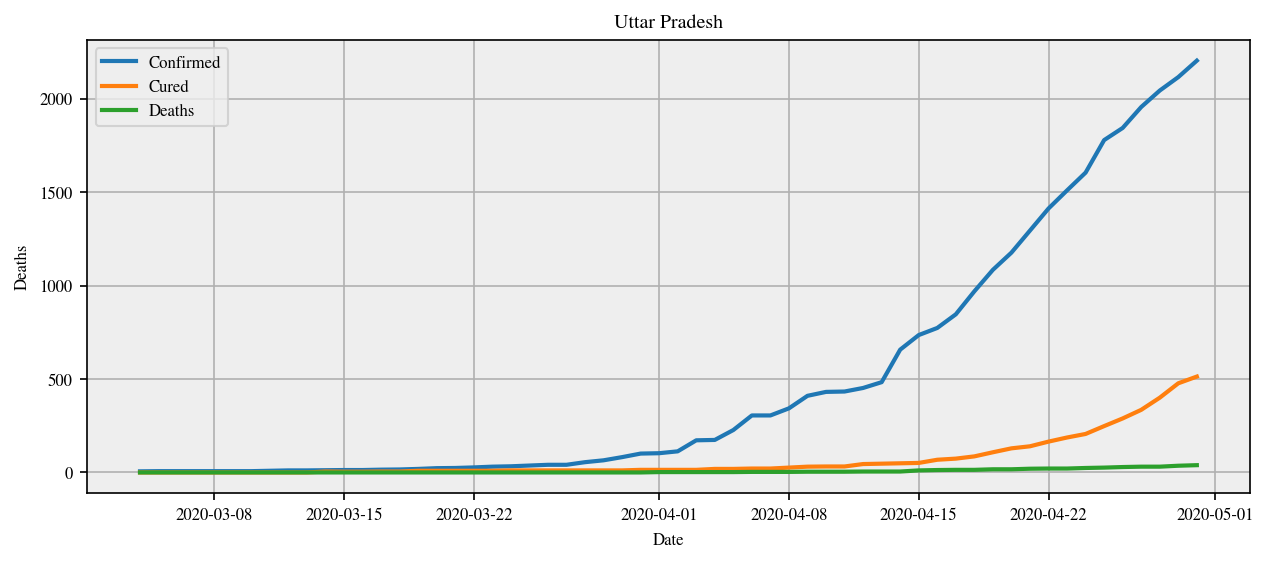

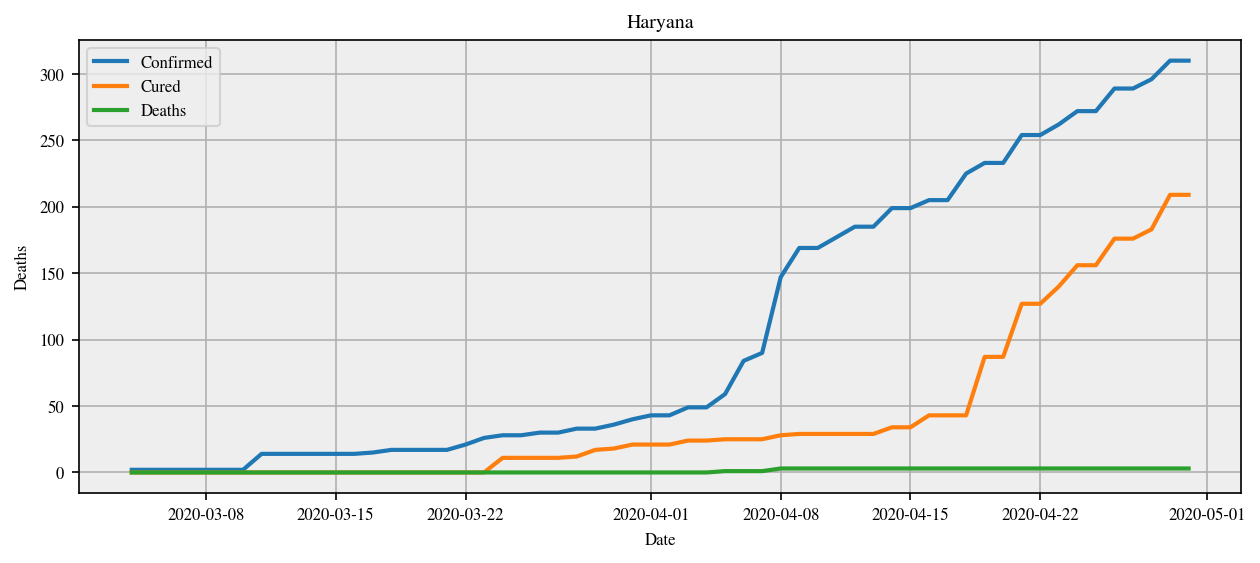

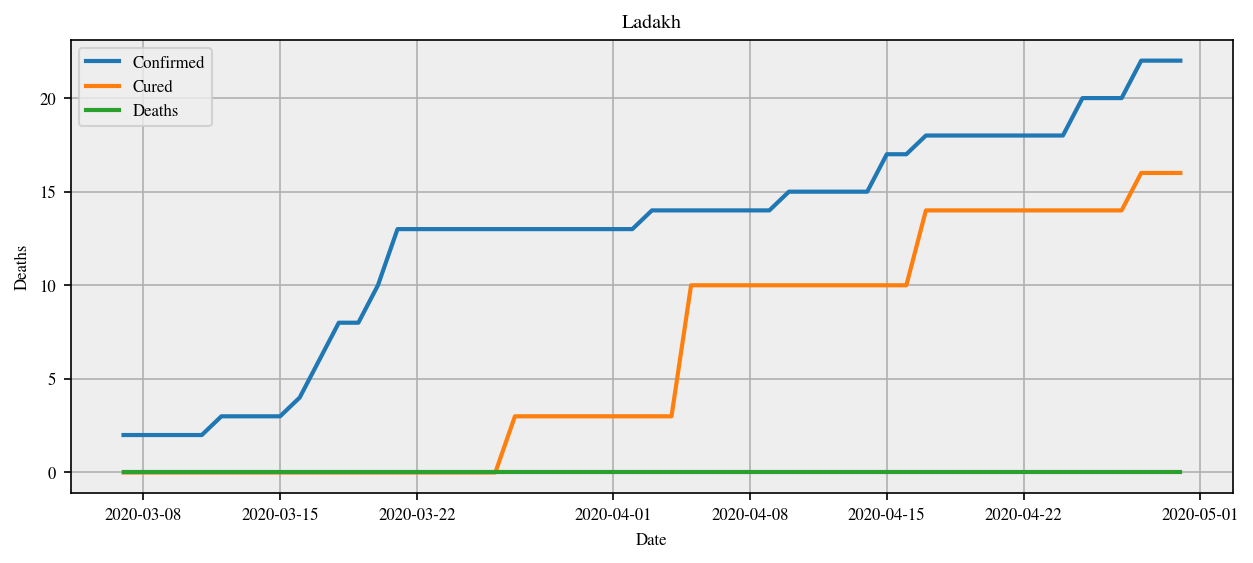

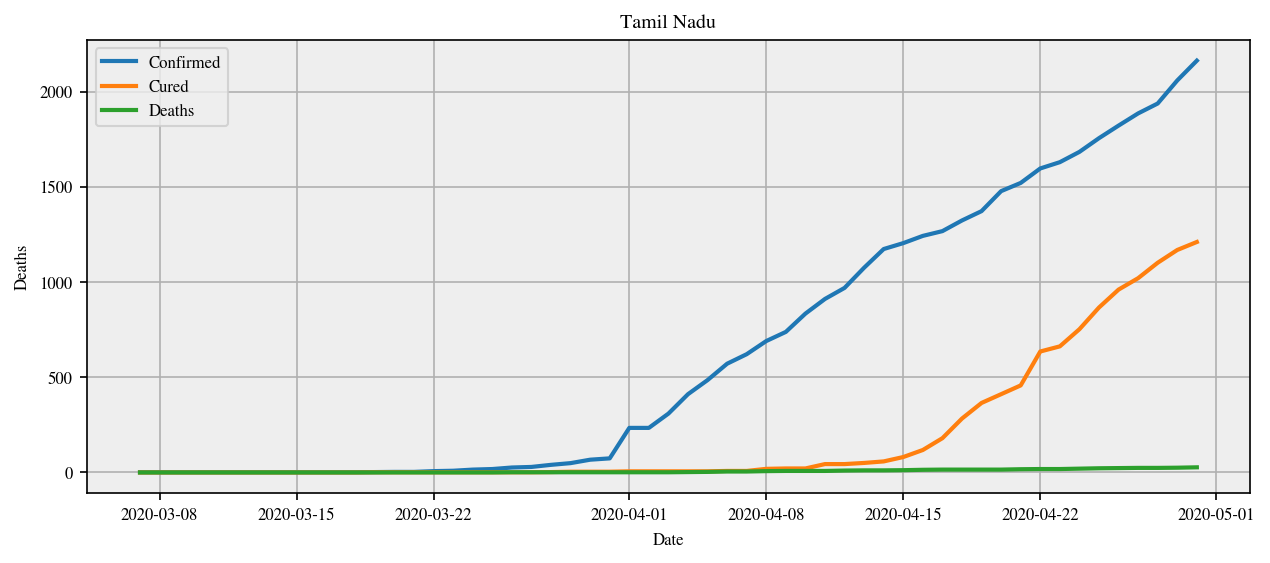

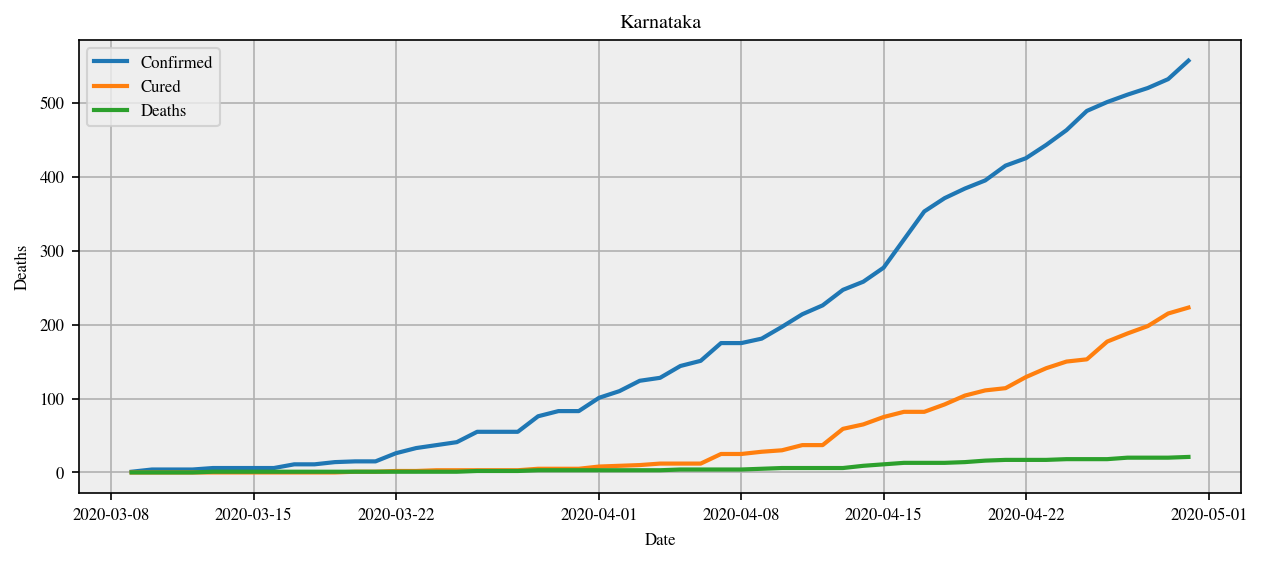

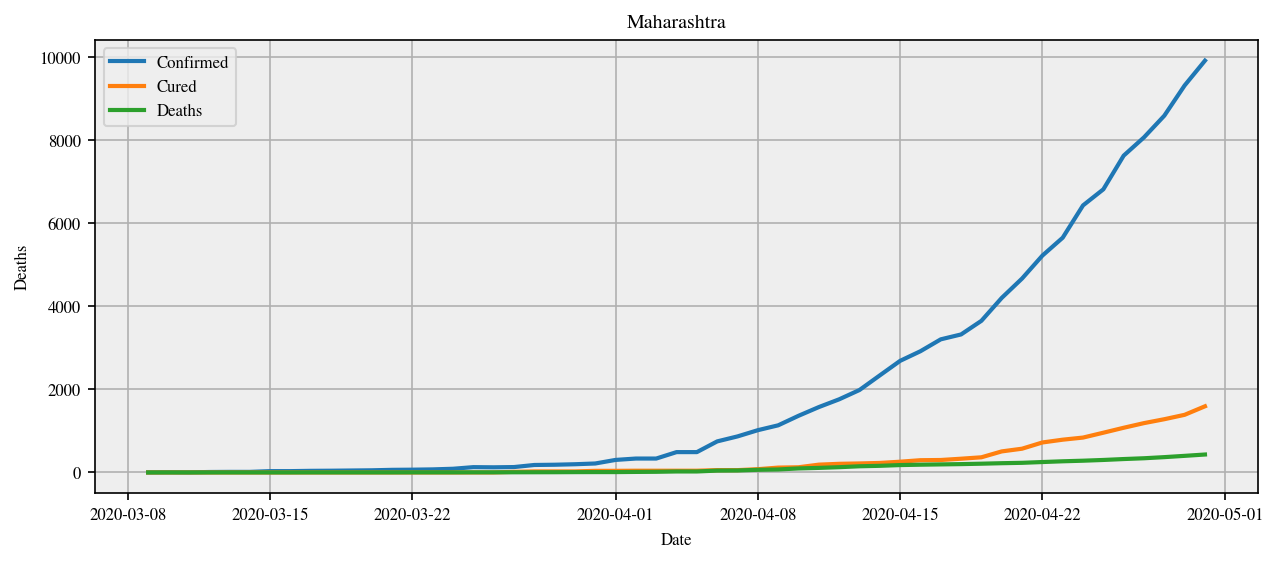

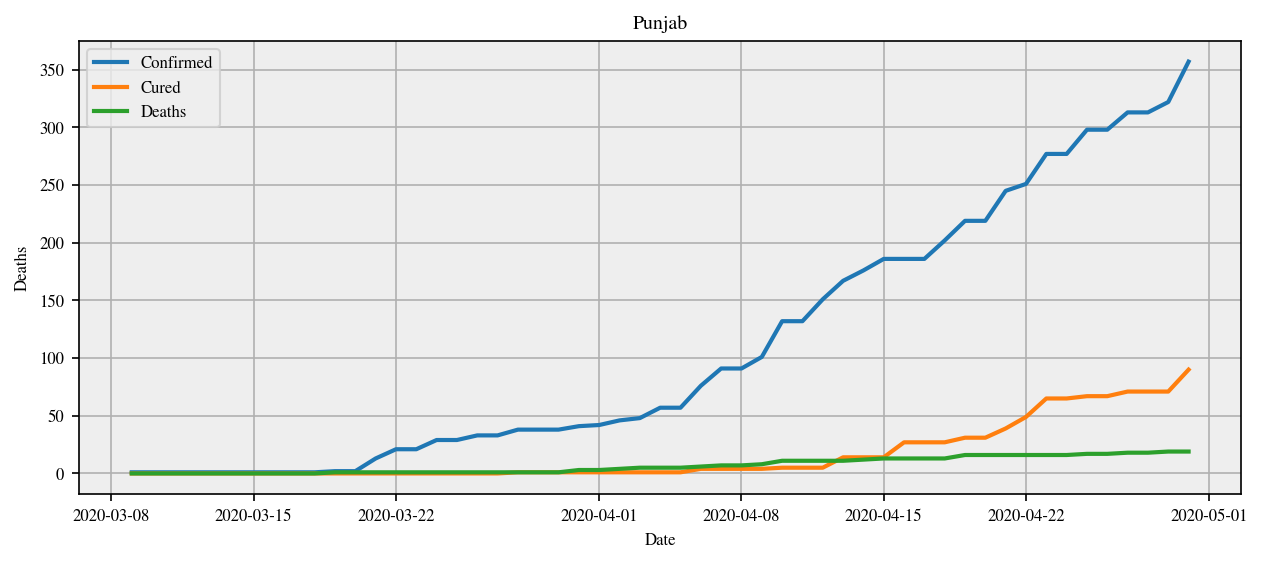

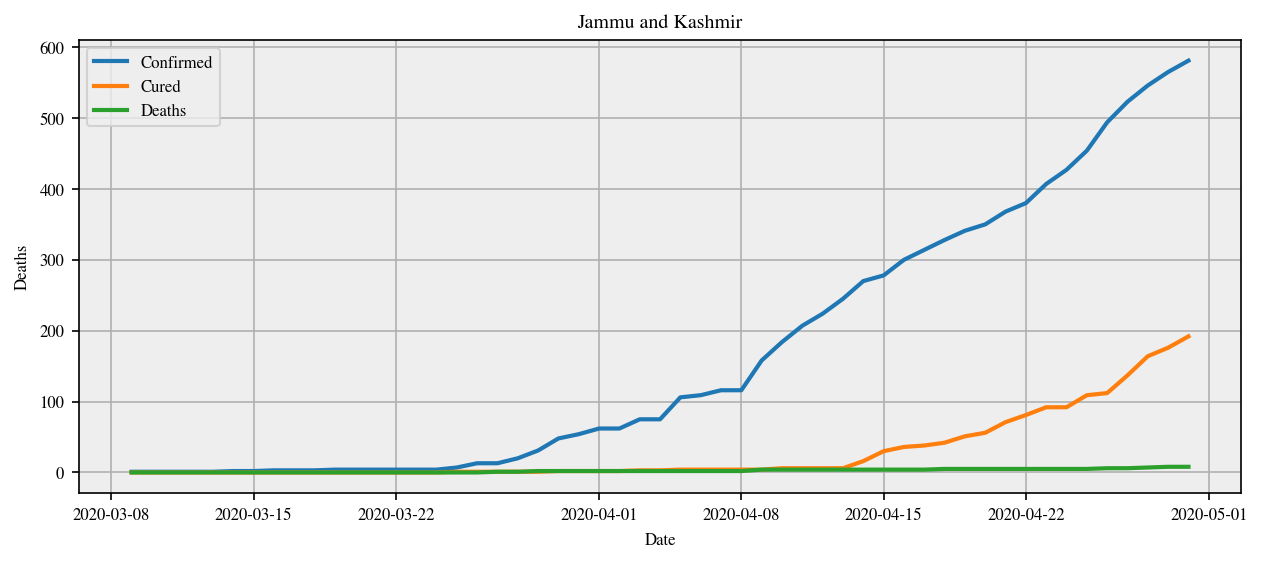

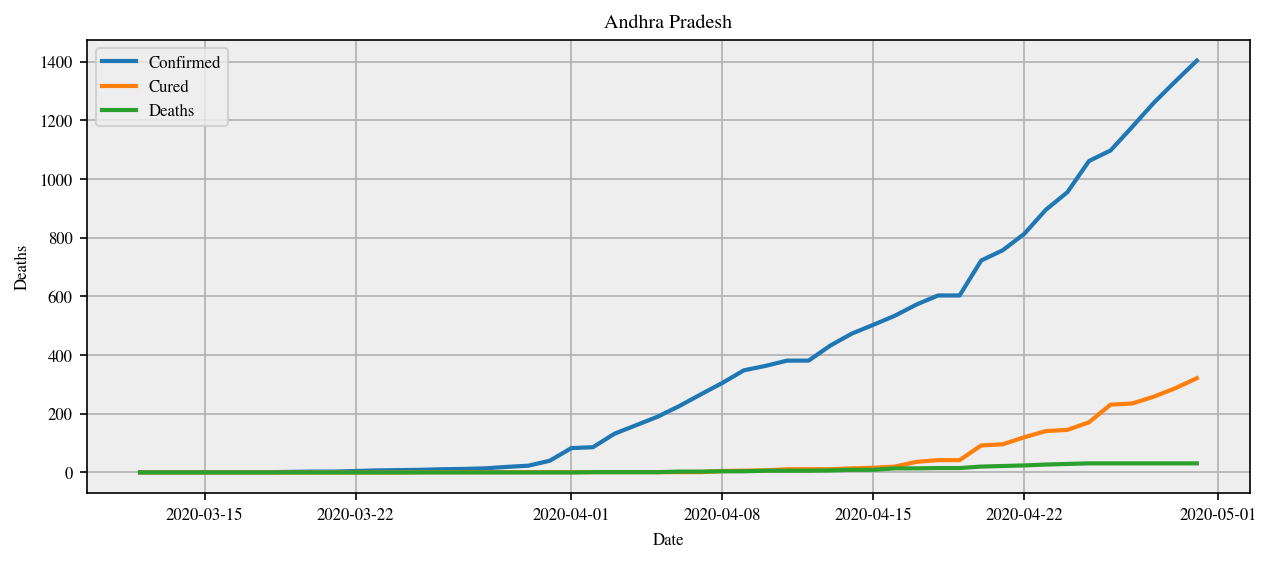

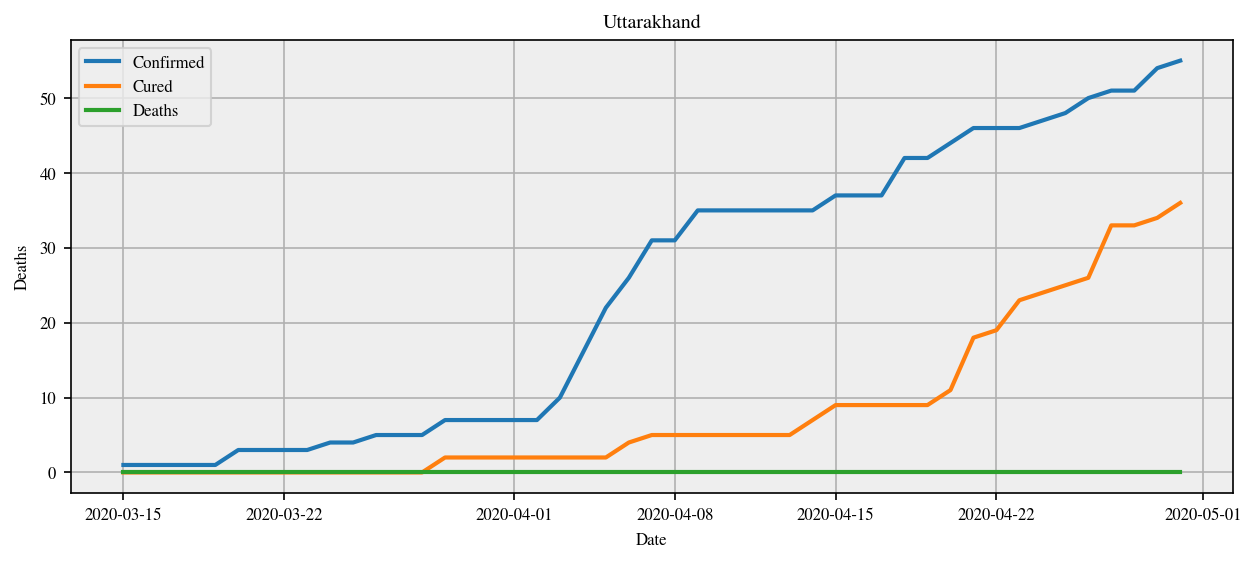

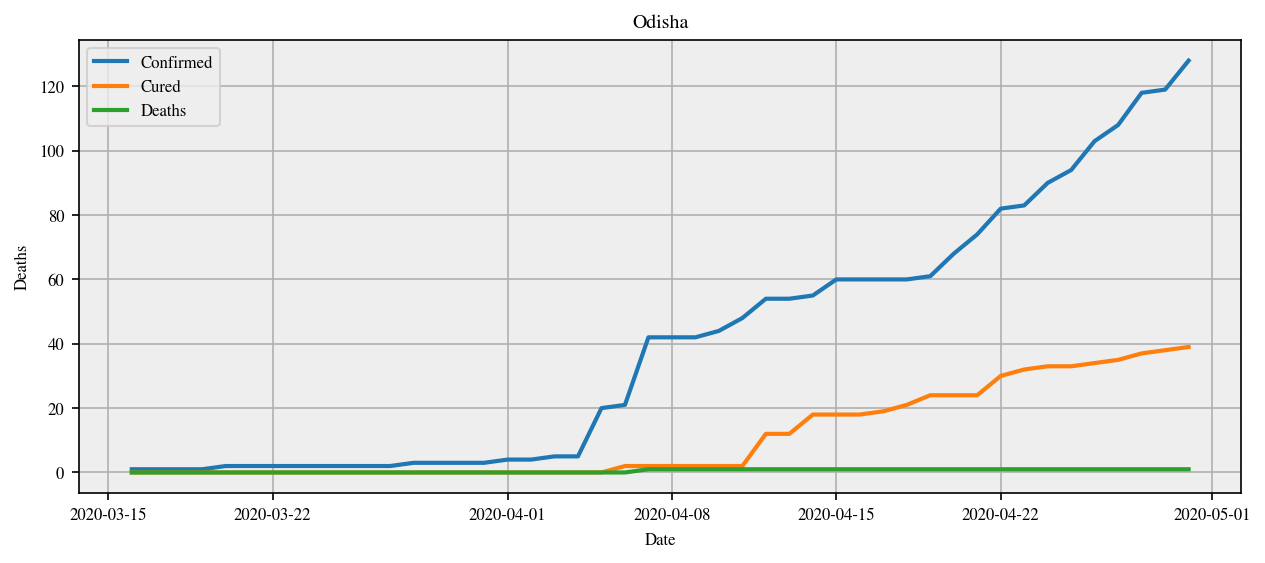

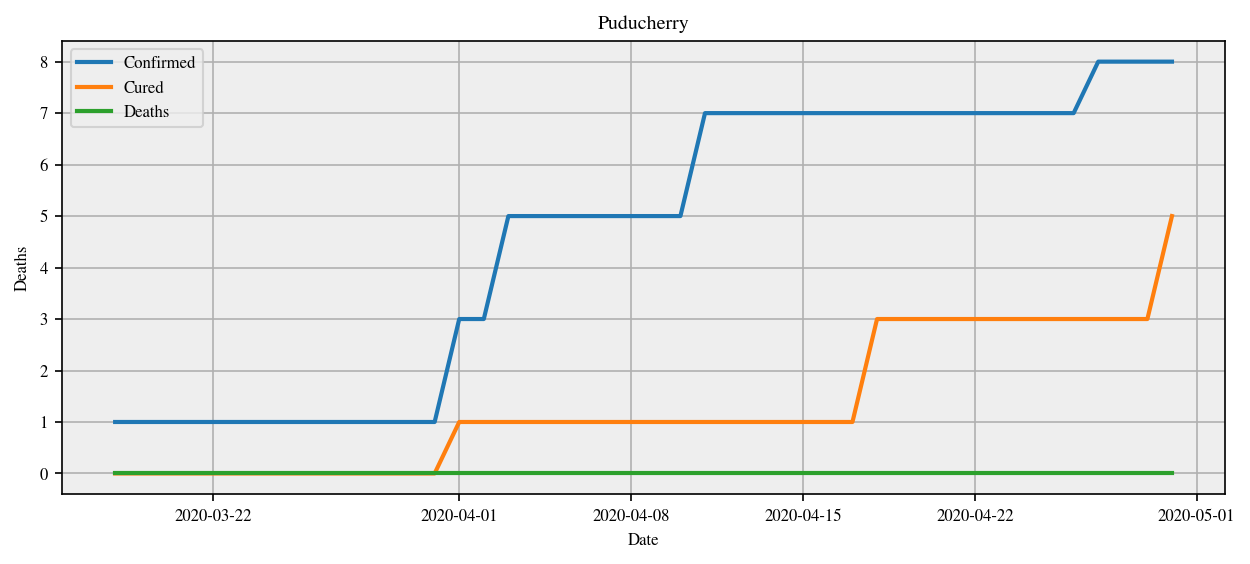

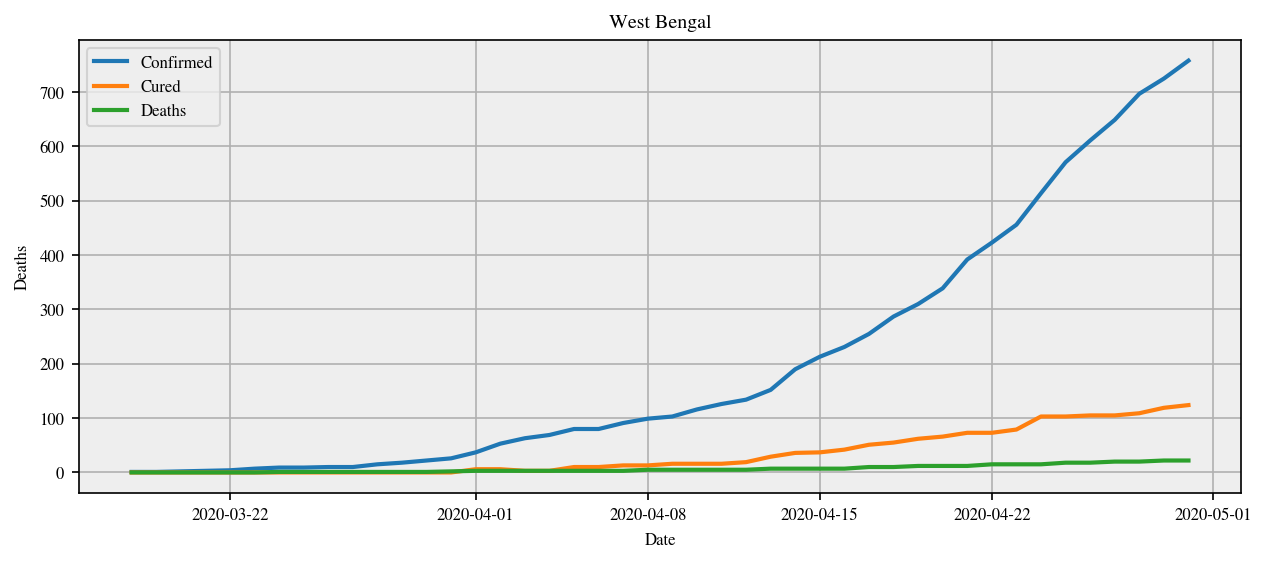

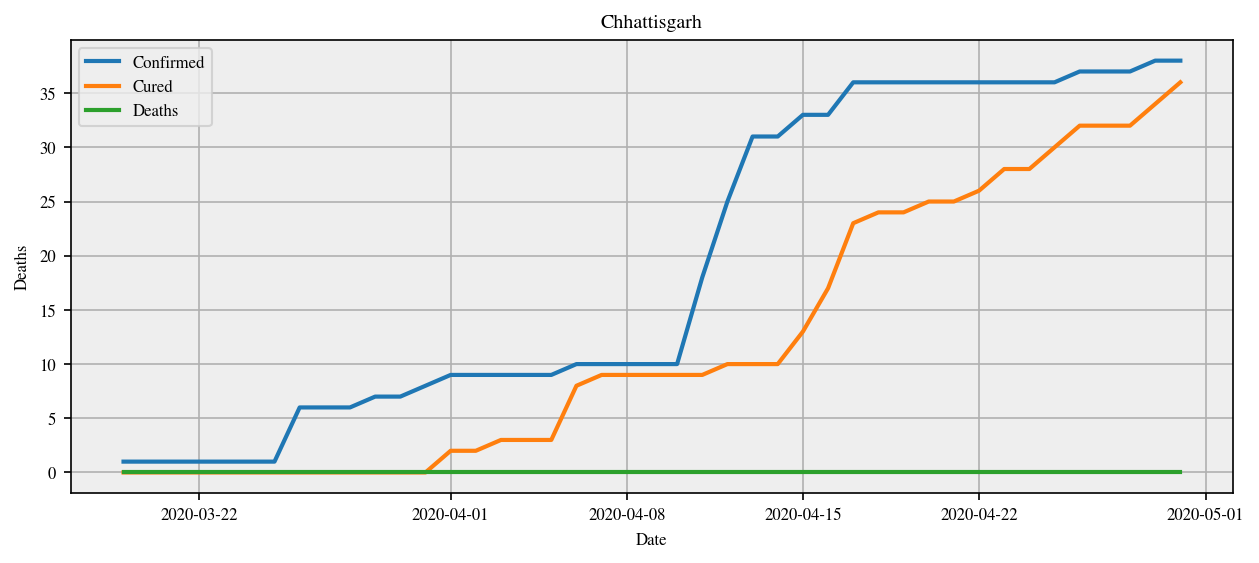

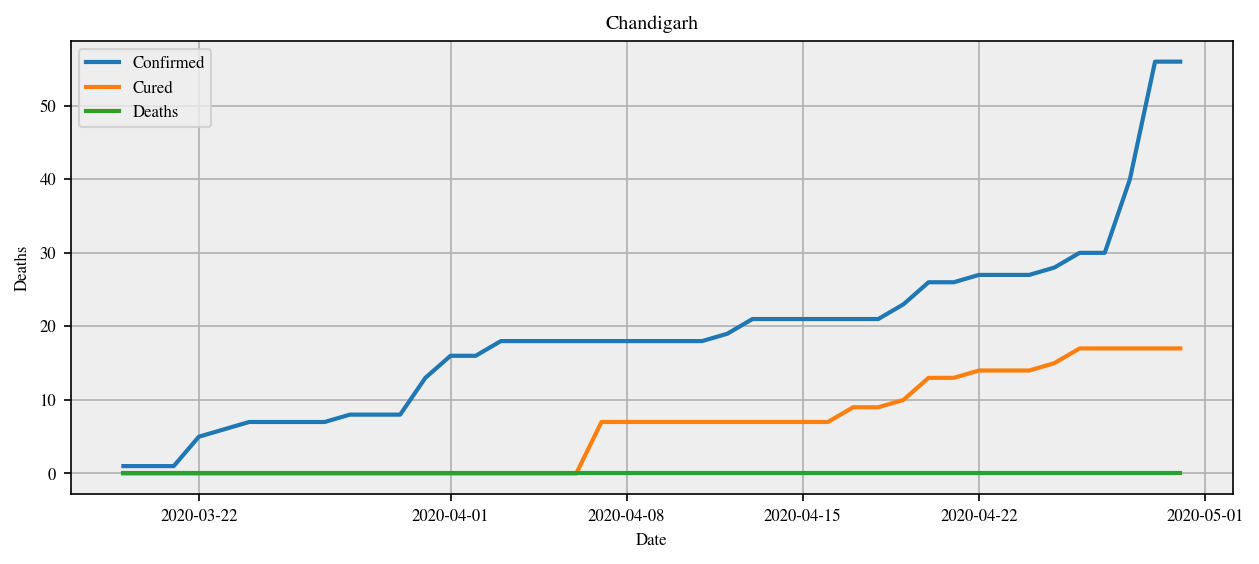

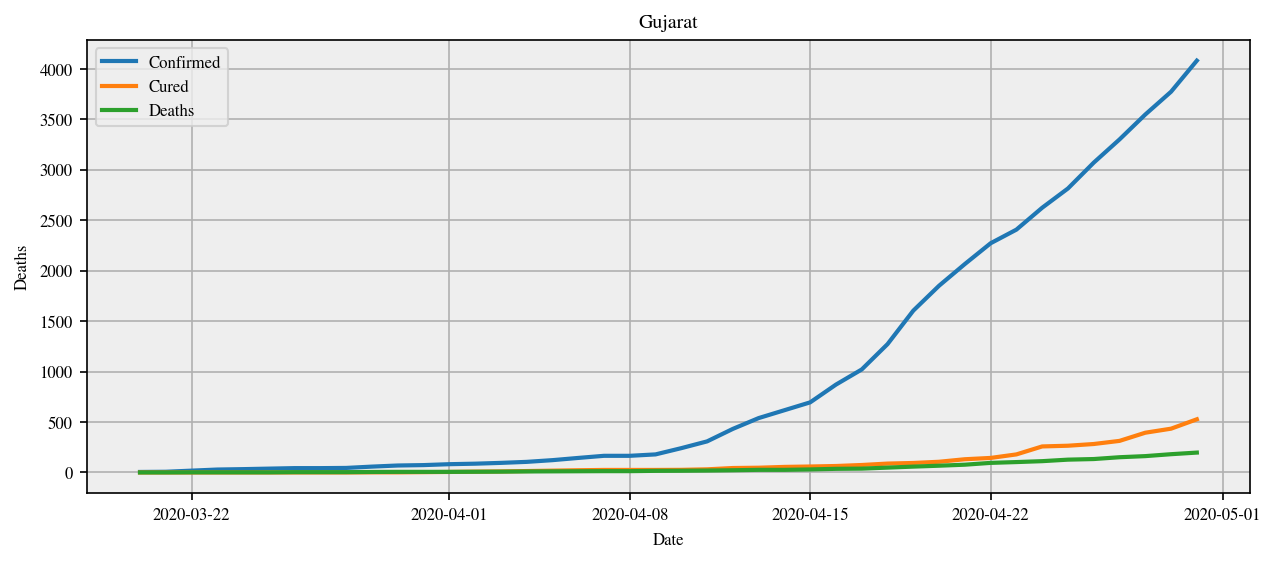

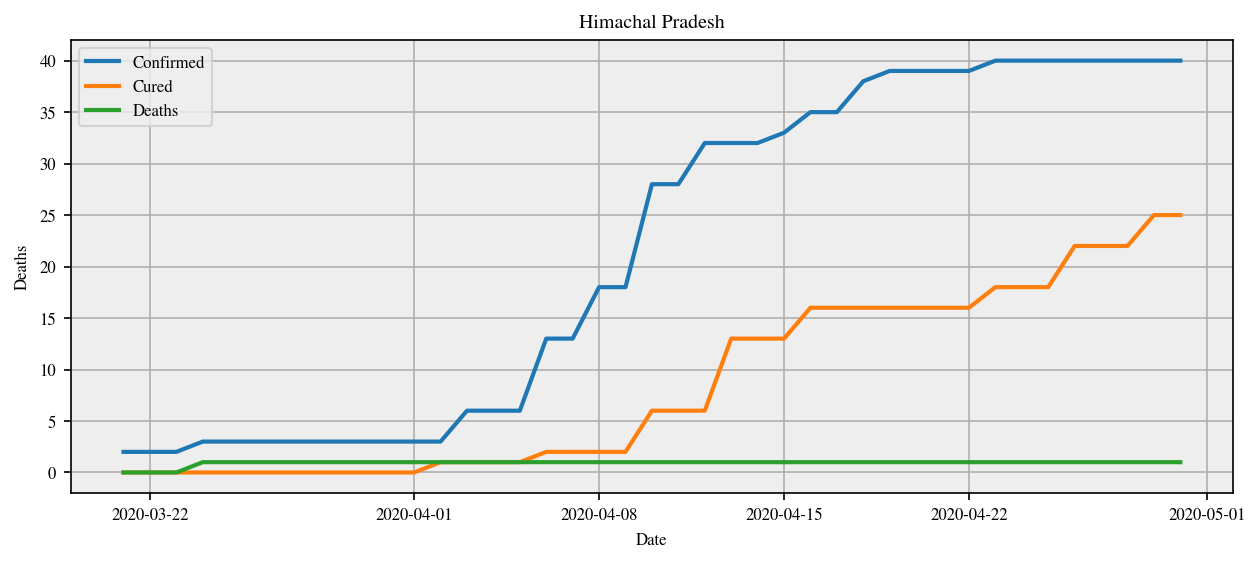

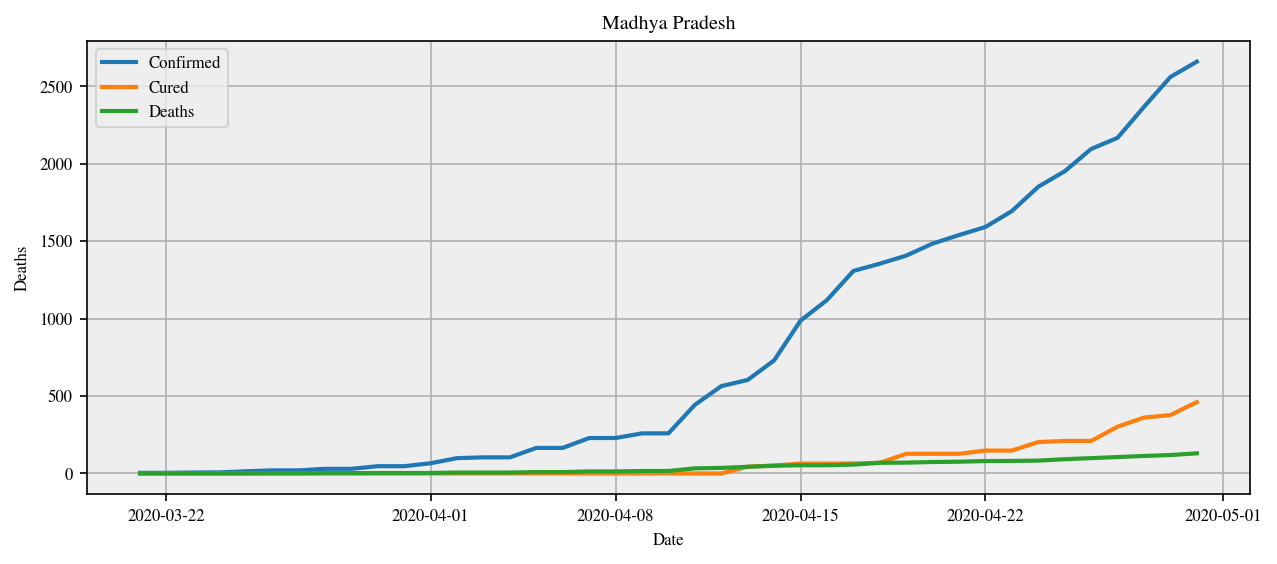

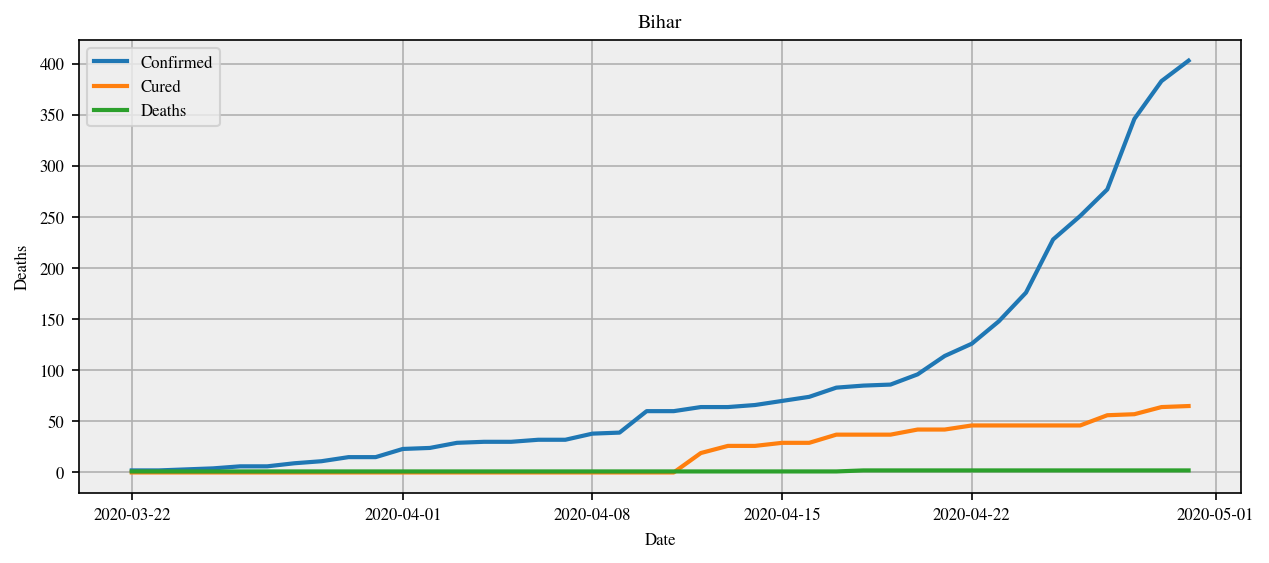

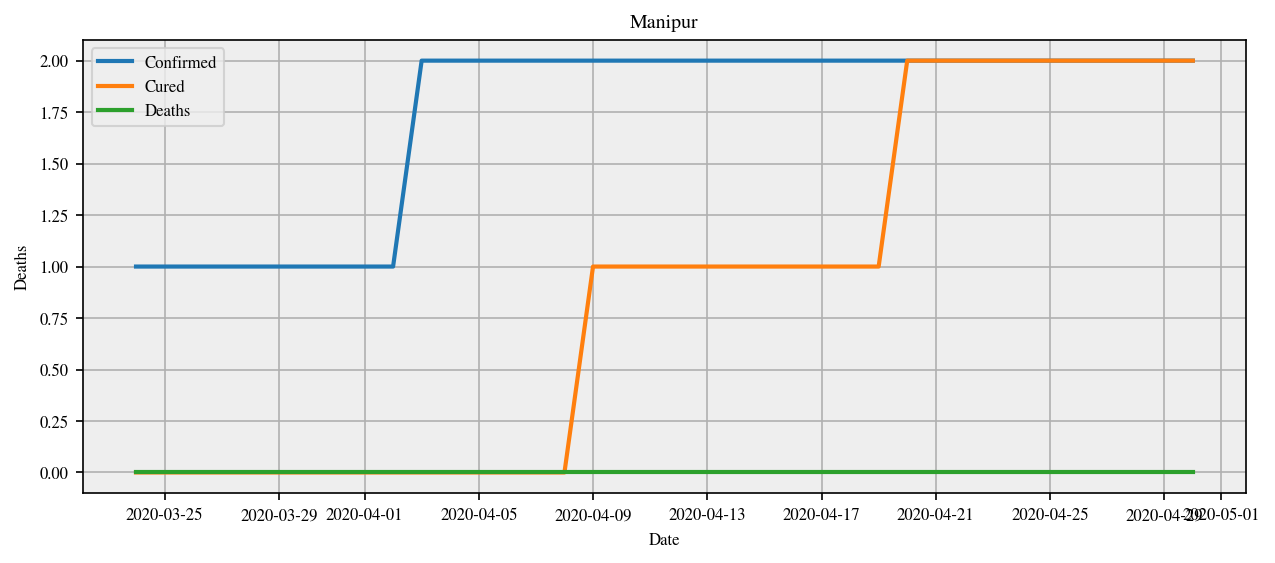

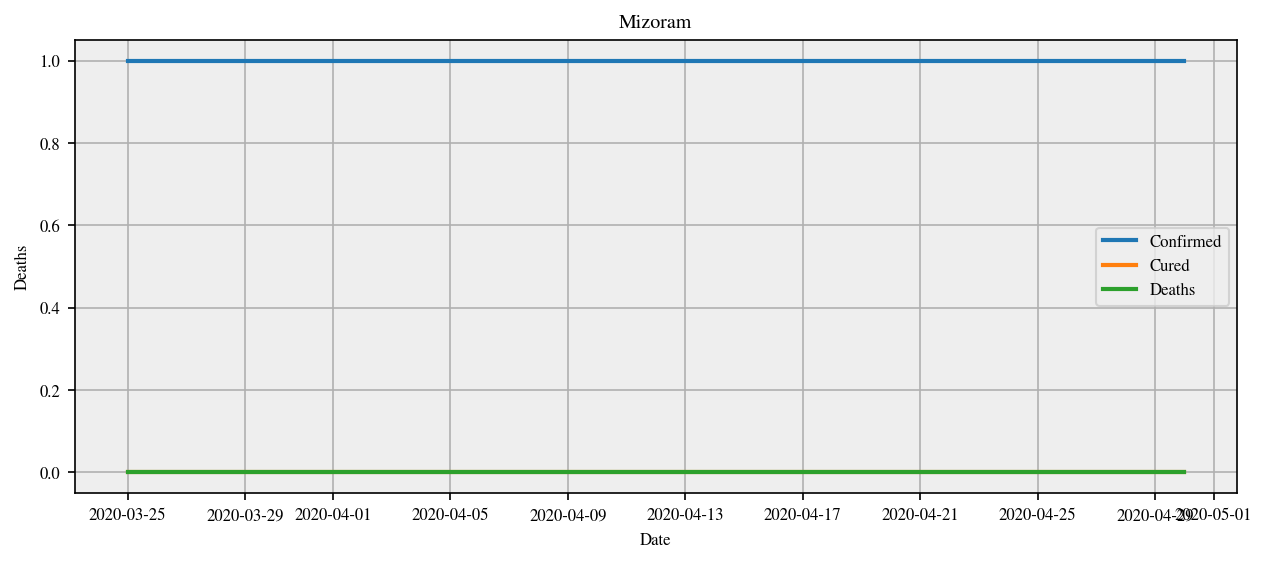

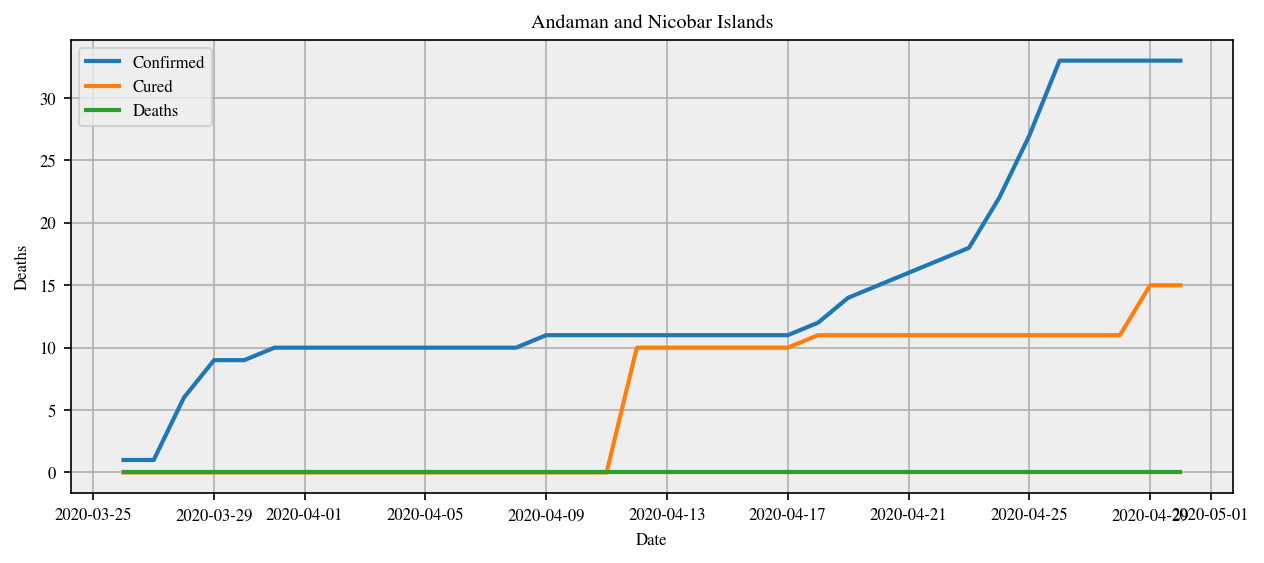

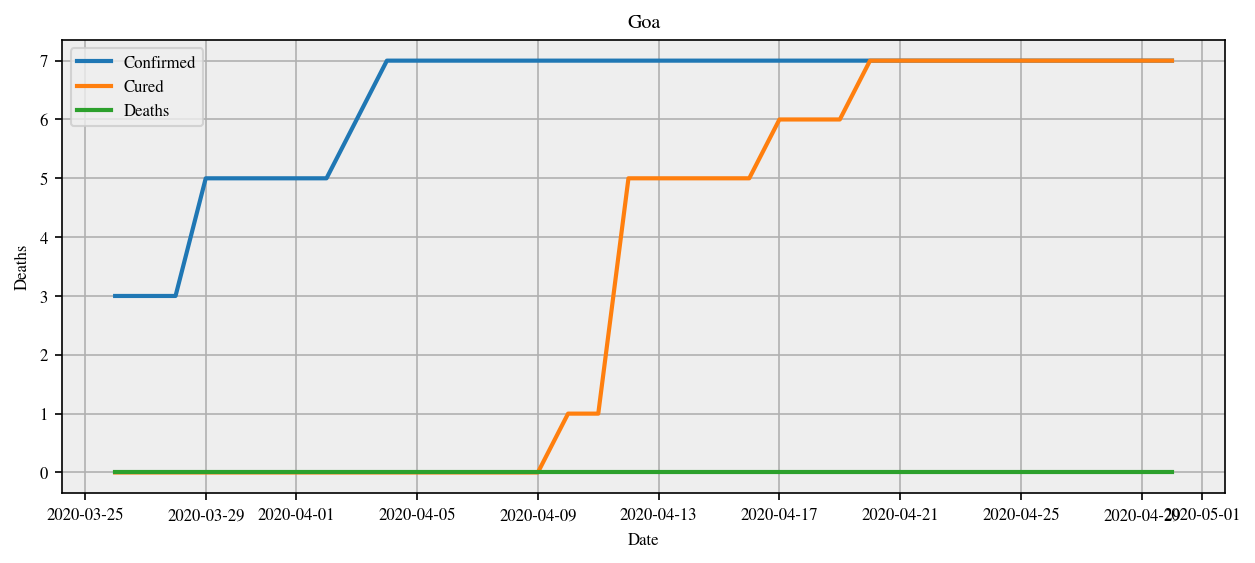

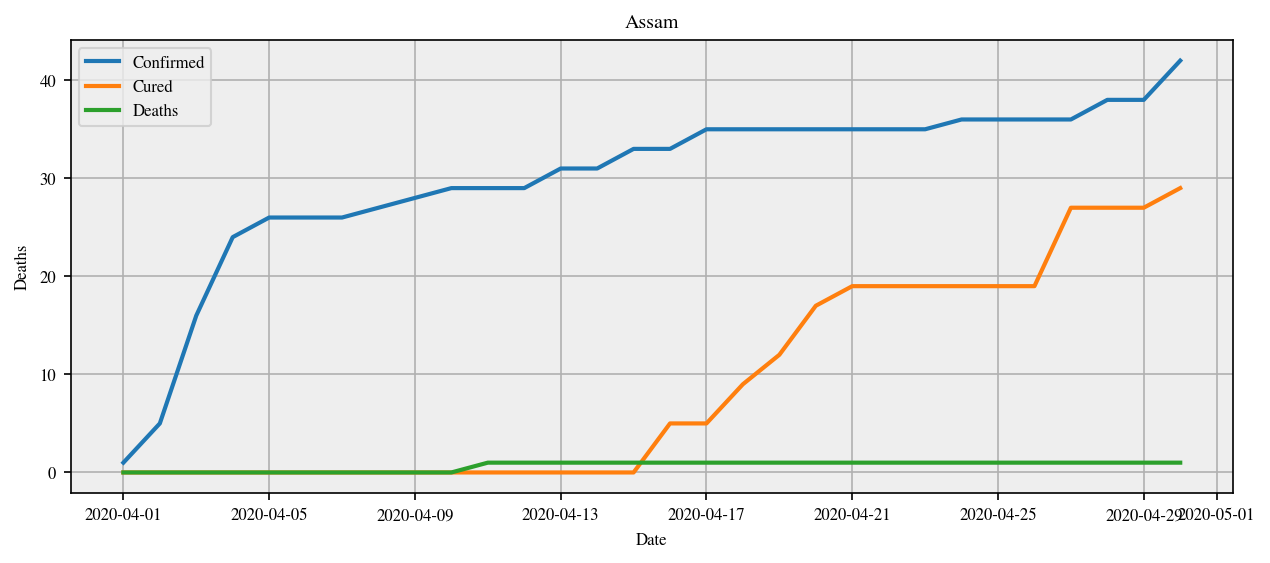

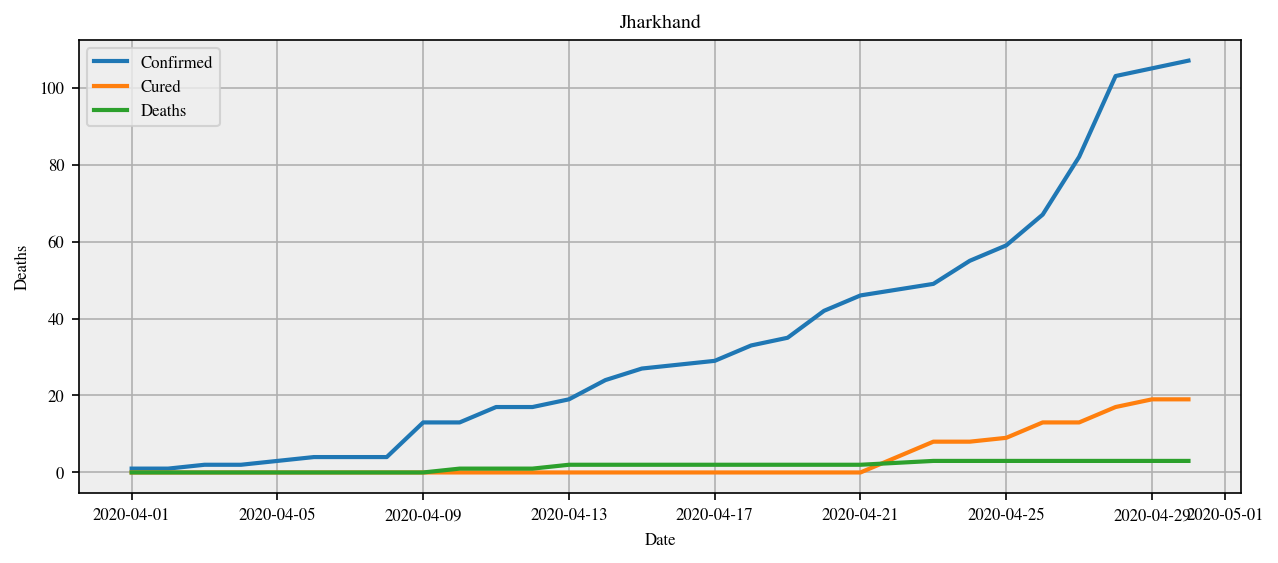

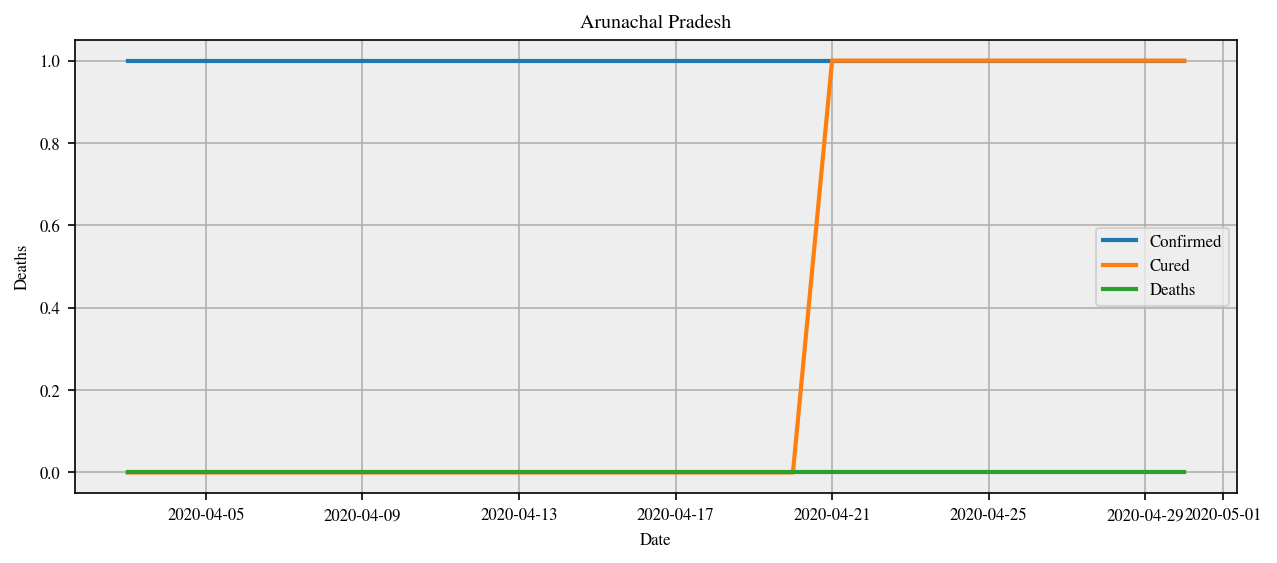

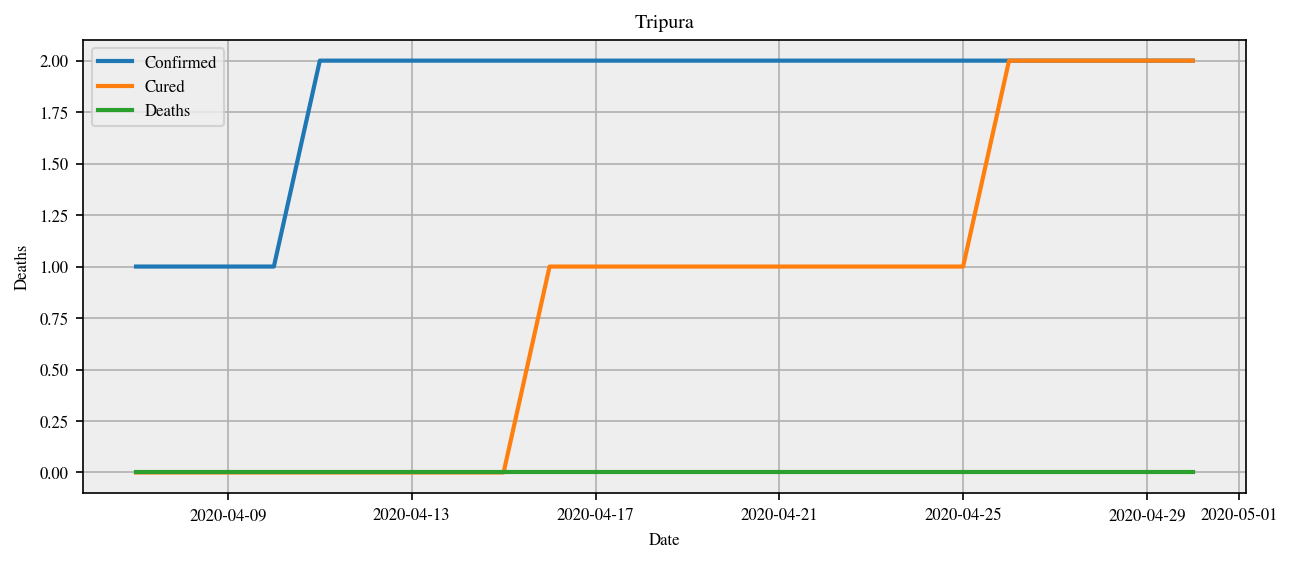

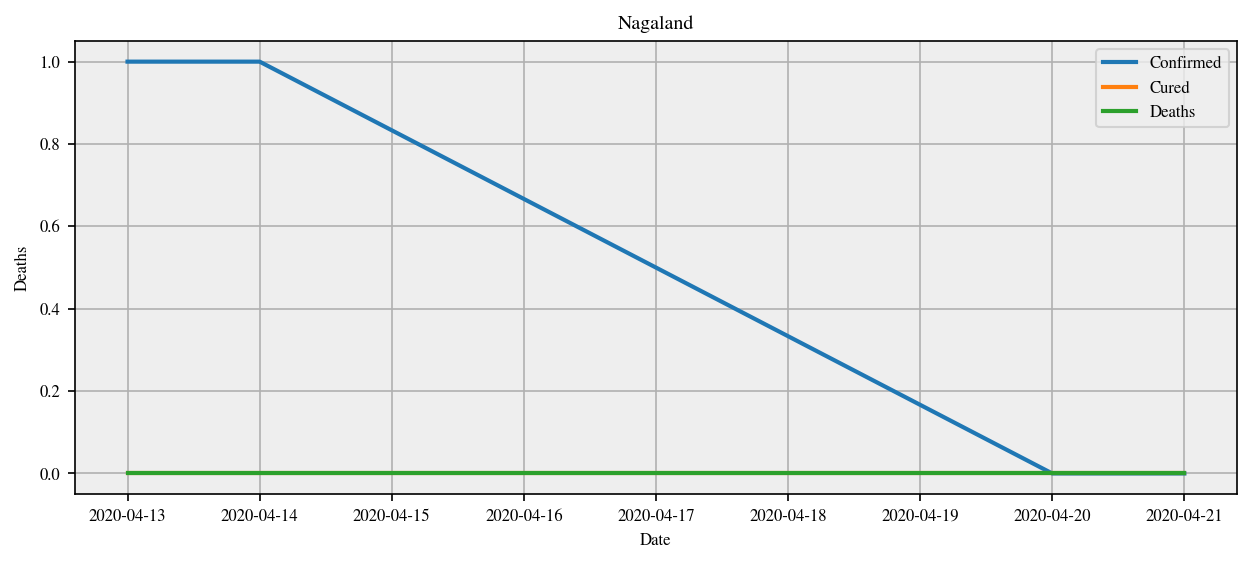

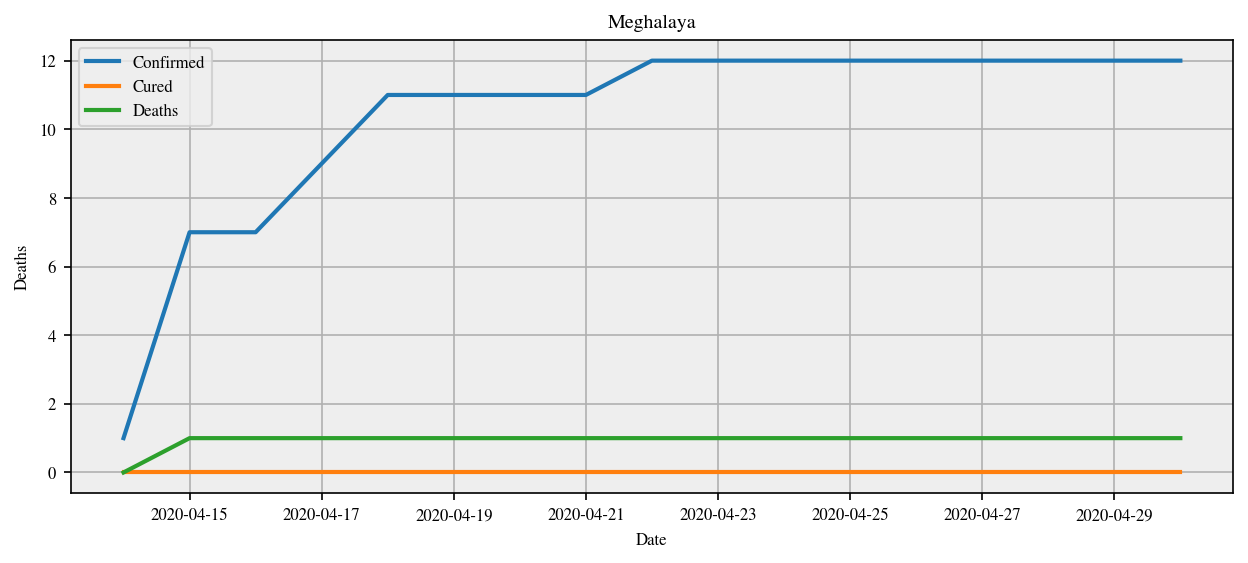

In [65]:
plt.figure(figsize=(12,4))
for i in states:
        sns.lineplot(x=df[df['State/UnionTerritory']==i]['Date'],y= df[df['State/UnionTerritory']==i]['Confirmed'],label='Confirmed')
        sns.lineplot(x=df[df['State/UnionTerritory']==i]['Date'],y= df[df['State/UnionTerritory']==i]['Cured'],label='Cured')
        sns.lineplot(x=df[df['State/UnionTerritory']==i]['Date'],y= df[df['State/UnionTerritory']==i]['Deaths'],label='Deaths')
        plt.title(i)
        plt.show()

In [66]:
country=df

In [67]:
country=(country.groupby('Date', as_index=False).sum())
country.reset_index(drop=False,inplace=True)

In [68]:
country

index       Date  Cured  Deaths  Confirmed
0       0 2020-01-30      0       0          1
1       1 2020-01-31      0       0          1
2       2 2020-02-01      0       0          2
3       3 2020-02-02      0       0          3
4       4 2020-02-03      0       0          3
..    ...        ...    ...     ...        ...
87     87 2020-04-26   5914     826      26605
88     88 2020-04-27   6362     886      28160
89     89 2020-04-28   7027     937      29834
90     90 2020-04-29   7797    1008      31709
91     91 2020-04-30   8373    1075      33330

[92 rows x 5 columns]

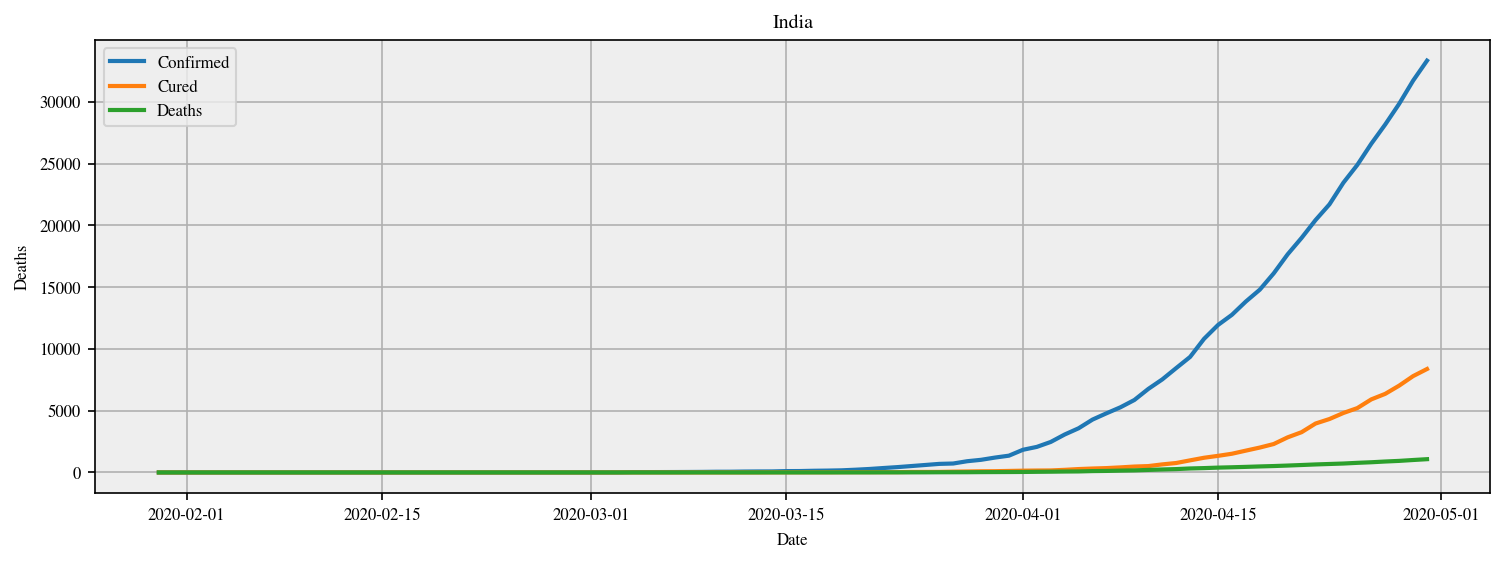

In [53]:
plt.figure(figsize=(12,4))
sns.lineplot(x=country['Date'],y= country['Confirmed'],label='Confirmed')
sns.lineplot(x=country['Date'],y= country['Cured'],label='Cured')
sns.lineplot(x=country['Date'],y= country['Deaths'],label='Deaths')
plt.title('India')
plt.show()